### 목표 설정
- kiwipiepy 형태소 분석기를 사용해보고 Konlpy와는 어떤점이 다른지 확인

### Kiwi 라이브러리
- 빠른 속도와 범용적인 성능을 지향하는 형태소 분석기
- C++로 구현된 코어를 래핑해서 다양한 프로그래밍 언어에서 사용하도록 만들었다. / 오픈소스 공개
- 세종 품사 태그셋을 사용한다.
- 웹 텍스트 약 87% / 문어체 텍스트는 94% 정확도로 형태소 분석이 가능하다. (공식 GitHub 참조)
- Konlpy보다 속도가 더 빠르다
- 간단한 오타나 띄어쓰기는 스스로 교정할 수 있는 기능을 제공.

In [37]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# 필요한 라이브러리 호출
import pandas as pd

In [39]:
# 경로 확인
!pwd

/content/drive/My Drive/Colab Notebooks/SW엔지니어


In [40]:
# 소스코드가 있는 경로로 위치를 변경
%cd /content/drive/MyDrive/Colab Notebooks/SW엔지니어

/content/drive/MyDrive/Colab Notebooks/SW엔지니어


In [41]:
# train 데이터 / test 데이터 불러오기
train = pd.read_csv('./data/ratings_train.csv',encoding = 'utf-8')
test = pd.read_csv('./data/ratings_test.csv',encoding = 'utf-8')

In [42]:
# 데이터 정보 확인 (train, test 모두 진행)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [44]:
# 결측치 삭제처리
# dropna()
train = train.dropna()
test = test.dropna()

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [47]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [48]:
# 데이터 분할 - 어떤 컬럼을 문제로 사용, 어떤 컬럼을 정답으로 사용.
X_train = train['document']
Y_train = train['label']
X_test = test['document']
Y_test = test['label']

In [49]:
# 데이터 shape 확인
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((149995,), (149995,), (49997,), (49997,))

### Kiwipiepy 라이브러리 설치
- Kiwipiepy 라이브러리는 의존성이 없다. 편리하게 환경 구축이 가능하다.

In [50]:
!pip install kiwipiepy

In [51]:
# 라이브러리 import
# 사이킷런 Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# 키위파이파이 형태소 분석기 import
from kiwipiepy import Kiwi, basic_typos_with_continual

In [52]:
# 객체 생성
kiwi = Kiwi(typos=basic_typos_with_continual)

- Kiwipiepy는 간단한 오타 교정도구를 제공
  - basic_typos : 형태소 내에 오타를 교정하는 도구태크
  - continual_typos : 형태소간의 연철 오타를 교정하는 도구
  - basic_typos_with_continual : 위의 두가지 오타 교정도구를 하나로 합친 기능

In [53]:
# 형태소 분석 - tokenize
token = kiwi.tokenize('아버지가 방에 들어가신다')
token

# form = 실제 형태소
# tag = 품사 태그
# start = 형태소의 시작 인덱스
# len : 형태소의 길이

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가', tag='JKS', start=3, len=1),
 Token(form='방', tag='NNG', start=5, len=1),
 Token(form='에', tag='JKB', start=6, len=1),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1),
 Token(form='ᆫ다', tag='EF', start=11, len=2)]

In [54]:
# 형태소 분석된 곳에서 태그만 뽑아오자
# tag

token[0].tag

'NNG'

In [55]:
# 형태소 분석된 곳에서 실제 형태소만 가져오자
# form

token[0].form

'아버지'

In [56]:
# 더미 문장 데이터를 이용해서, kiwi 라이브러리 사용법 익혀보기
text = '오늘은 수요일이당. 주말이 어서 어서 와랔ㅋㅋ ㅋㅋㅋㅋ'
# 형태소 분석 시작
token = kiwi.tokenize(text)
token

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='수요일', tag='NNG', start=4, len=3),
 Token(form='이', tag='VCP', start=7, len=1),
 Token(form='다', tag='EF', start=8, len=1),
 Token(form='ᆼ', tag='Z_CODA', start=8, len=1),
 Token(form='.', tag='SF', start=9, len=1),
 Token(form='주말', tag='NNG', start=11, len=2),
 Token(form='이', tag='VCP', start=13, len=1),
 Token(form='어서', tag='EC', start=15, len=2),
 Token(form='어서', tag='MAG', start=18, len=2),
 Token(form='오', tag='VV', start=21, len=1),
 Token(form='어라', tag='EC', start=21, len=2),
 Token(form='ᆿ', tag='Z_CODA', start=22, len=1),
 Token(form='ㅋㅋ', tag='SW', start=23, len=2),
 Token(form='ㅋㅋㅋㅋ', tag='SW', start=26, len=4)]

In [57]:
# 오타 교정 도구 옵션 수정하기
from kiwipiepy import basic_typos

In [58]:
kiwi2 = Kiwi(typos=basic_typos)

In [59]:
# 오타 수정

# 더미 문장 데이터를 이용해서, kiwi 라이브러리 사용법 익혀보기
text = '오늘은 수요일이당. 주말이 어서 어서 와랔ㅋㅋ ㅋㅋㅋㅋ'
# 형태소 분석 시작

# normalize_coda
# 초성체가 어절 뒤에 붙는 경우, 초성체를 분리해주는 기능(기본값 : False)
token = kiwi.tokenize(text, normalize_coda=True)
token

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='수요일', tag='NNG', start=4, len=3),
 Token(form='이', tag='VCP', start=7, len=1),
 Token(form='다', tag='EF', start=8, len=1),
 Token(form='ᆼ', tag='Z_CODA', start=8, len=1),
 Token(form='.', tag='SF', start=9, len=1),
 Token(form='주말', tag='NNG', start=11, len=2),
 Token(form='이', tag='VCP', start=13, len=1),
 Token(form='어서', tag='EC', start=15, len=2),
 Token(form='어서', tag='MAG', start=18, len=2),
 Token(form='오', tag='VV', start=21, len=1),
 Token(form='어라', tag='EC', start=21, len=2),
 Token(form='ㅋㅋㅋ', tag='SW', start=22, len=3),
 Token(form='ㅋㅋㅋㅋ', tag='SW', start=26, len=4)]

In [60]:
# z_coda
# 조사 및 어미에 붙은 덧받침을 분리하는 기능 (기본값 : True)

# 와랔 을 와라 ㅋ 로 분리하는 기능
token = kiwi.tokenize(text, z_coda=False)
token

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='수요일', tag='NNG', start=4, len=3),
 Token(form='이', tag='JKS', start=7, len=1),
 Token(form='당', tag='NNG', start=8, len=1),
 Token(form='.', tag='SF', start=9, len=1),
 Token(form='주말', tag='NNG', start=11, len=2),
 Token(form='이', tag='JKS', start=13, len=1),
 Token(form='어서', tag='MAG', start=15, len=2),
 Token(form='어서', tag='MAG', start=18, len=2),
 Token(form='와랔', tag='NNP', start=21, len=2),
 Token(form='ㅋㅋ', tag='SW', start=23, len=2),
 Token(form='ㅋㅋㅋㅋ', tag='SW', start=26, len=4)]

In [61]:
# split_complex
# 합성어 분리하는 기능 (기본값 : False)

# 형태소 : 의미를 가진 가장 작은 언어의 단위
kiwi2.tokenize('얼마전 국수집에 방문했더니, 설탕통이 번쩍거리며 눈에 들어왔다.', split_complex=False)

# 형태소를 최대한 잘게 분할하는 기능. (현재는 False) > 합성어를 나누지 않은 상태

[Token(form='얼마', tag='NNG', start=0, len=2),
 Token(form='전', tag='NNG', start=2, len=1),
 Token(form='국수', tag='NNG', start=4, len=2),
 Token(form='집', tag='NNG', start=6, len=1),
 Token(form='에', tag='JKB', start=7, len=1),
 Token(form='방문', tag='NNG', start=9, len=2),
 Token(form='하', tag='XSV', start=11, len=1),
 Token(form='었', tag='EP', start=11, len=1),
 Token(form='더니', tag='EC', start=12, len=2),
 Token(form=',', tag='SP', start=14, len=1),
 Token(form='설탕', tag='NNG', start=16, len=2),
 Token(form='통', tag='NNG', start=18, len=1),
 Token(form='이', tag='JKS', start=19, len=1),
 Token(form='번쩍거리', tag='VV', start=21, len=4),
 Token(form='며', tag='EC', start=25, len=1),
 Token(form='눈', tag='NNG', start=27, len=1),
 Token(form='에', tag='JKB', start=28, len=1),
 Token(form='들어오', tag='VV', start=30, len=3),
 Token(form='었', tag='EP', start=32, len=1),
 Token(form='다', tag='EF', start=33, len=1),
 Token(form='.', tag='SF', start=34, len=1)]

In [62]:
# split_complex
# 합성어 분리하는 기능 (기본값 : False)

# 형태소 : 의미를 가진 가장 작은 언어의 단위
kiwi2.tokenize('얼마전 국수집에 방문했더니, 설탕통이 번쩍거리며 눈에 들어왔다.', split_complex=True)

# 형태소를 최대한 잘게 분할하는 기능.

[Token(form='얼마', tag='NNG', start=0, len=2),
 Token(form='전', tag='NNG', start=2, len=1),
 Token(form='국수', tag='NNG', start=4, len=2),
 Token(form='집', tag='NNG', start=6, len=1),
 Token(form='에', tag='JKB', start=7, len=1),
 Token(form='방문', tag='NNG', start=9, len=2),
 Token(form='하', tag='XSV', start=11, len=1),
 Token(form='었', tag='EP', start=11, len=1),
 Token(form='더니', tag='EC', start=12, len=2),
 Token(form=',', tag='SP', start=14, len=1),
 Token(form='설탕', tag='NNG', start=16, len=2),
 Token(form='통', tag='NNG', start=18, len=1),
 Token(form='이', tag='JKS', start=19, len=1),
 Token(form='번쩍', tag='MAG', start=21, len=2),
 Token(form='거리', tag='XSV', start=23, len=2),
 Token(form='며', tag='EC', start=25, len=1),
 Token(form='눈', tag='NNG', start=27, len=1),
 Token(form='에', tag='JKB', start=28, len=1),
 Token(form='들', tag='VV', start=30, len=1),
 Token(form='어', tag='EC', start=31, len=1),
 Token(form='오', tag='VX', start=32, len=1),
 Token(form='었', tag='EP', start=32, len

In [63]:
# 기본적인 오타 교정
kiwi.tokenize('외않됀대?')

[Token(form='왜', tag='MAG', start=0, len=1),
 Token(form='안', tag='MAG', start=1, len=1),
 Token(form='되', tag='VV', start=2, len=1),
 Token(form='ᆫ대', tag='EF', start=2, len=2),
 Token(form='?', tag='SF', start=4, len=1)]

In [64]:
# 위의 기능을 함수화 시켜서 토큰화 도구에 연결해보자
def myTokenizer(text):
  result = kiwi.tokenize(text)
  for token in result:
    if token.tag in ['NNG','NNP']: # 보통명사, 고유명사 형태소만 가져오기
      yield token.form

### return 이 아닌 yield 를 사용하는 이유
- yield : 반환값을 제너레이터로 변환
- 제너레이터 : 여러개의 데이터를 미리 만들어두는게 아닌, 필요할 때마다 하나씩 즉석으로 만들어주는 객체 > for문에서 사용 적합
- 메모리에 부담을 줄 만큼 대용량의 파일을 읽어오거나, 흐름이 있는 스트림 데이터를 처리할 때 사용한다.

In [65]:
# 함수 정의
def return_abc():
  return 'A'
  return 'B'
  return 'C'

def yield_abc():
  yield 'A'
  yield 'B'
  yield 'C'

In [74]:
print(return_abc())

A


In [75]:
print(yield_abc())

<generator object yield_abc at 0x796130811220>


In [80]:
for ch in return_abc():
  print(ch)

A


In [81]:
for ch in yield_abc():
  print(ch)

A
B
C


In [82]:
import time

In [83]:
# 함수 정의시 반복문
def return_abc():
  for ch in 'ABC':
    time.sleep(1)
    return ch


In [84]:
for ch in return_abc():
  print(ch)

A


In [86]:
# 함수 정의시 반복문
def yield_abc():
  for ch in 'ABC':
    time.sleep(1)
    yield ch

In [87]:
for ch in yield_abc():
  print(ch)

A
B
C


In [88]:
# 더미문장 입력
list(myTokenizer('어제는 커피를 마셨고, 오늘은 지코를 마실겁니다.'))

['어제', '커피', '오늘', '지코']

In [89]:
X_train[:3]

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다


In [91]:
# tfidf Vectorizer + myTokenizer 사용
tfidf = TfidfVectorizer(tokenizer=myTokenizer)
tfidf.fit(X_train[:3])
tfidf.vocabulary_

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'더빙': 1,
 '짜증': 7,
 '목소리': 2,
 '포스터': 10,
 '초딩': 8,
 '영화': 4,
 '줄': 6,
 '오버': 5,
 '연기': 3,
 '너무재밓': 0,
 '추천': 9}

- 오타 교정 도구를 추가했지만 오타 교정이 되지 않았다.
- 오타 교정 도구가 있어도 여러 형태소가 결합되거나 넘나드는 경우에는 오타 교정이 쉽게 되지 않는다.
- 데이터 전처리의 중요성.

In [93]:
# 감성분석을 위해. 동사, 형용사, 보통명사만 가져오자
def myTokenizer2(text):
  # 띄어쓰기 교정
  # space
  text_space = kiwi.space(text, reset_whitespace =True)
  # reset_whitespace=False : 원래 문장들의 공백을 최대한 유지하면서, 필요한 부분만 수정.
  # reset_whitespace=True : 원래 문장들의 공백정보 무시, 새롭게 띄어쓰기 재구성
  result = kiwi.tokenize(text_space, split_complex=True)
  for token in result:
    if token.tag in ['NNG','VV','VA']: # 보통명사, 고유명사 형태
      yield token.form

In [94]:
# tfidf Vectorizer + myTokenizer2
tfidf = TfidfVectorizer(tokenizer=myTokenizer2)
tfidf.fit(X_train[:3])
tfidf.vocabulary_

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'더빙': 1,
 '짜증': 8,
 '나': 0,
 '목소리': 2,
 '포스터': 10,
 '보': 3,
 '영화': 5,
 '줄': 7,
 '오버': 6,
 '연기': 4,
 '추천': 9}

In [96]:
final_tfidf = TfidfVectorizer(tokenizer=myTokenizer2)
final_tfidf.fit(X_train[:10000])

TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x796159705760>)

In [ ]:
# 실제 데이터 토큰화 시작
# konlpy의 Kkma보다 속도가 더 빠름

In [98]:
final_tfidf.vocabulary_

{'더빙': 1388,
 '짜증': 5530,
 '나': 965,
 '목소리': 2033,
 '포스터': 6256,
 '보': 2488,
 '영화': 4083,
 '줄': 5330,
 '오버': 4149,
 '연기': 4010,
 '추천': 5768,
 '교도소': 572,
 '이야기': 4616,
 '재미': 4927,
 '없': 3895,
 '평점': 6235,
 '조정': 5207,
 '익살': 4653,
 '돋보이': 1458,
 '늙': 1217,
 '보이': 2513,
 '이쁘': 4605,
 '걸음마': 276,
 '떼': 1635,
 '초등학교': 5696,
 '학년': 6410,
 '용': 4293,
 '반': 2284,
 '원작': 4381,
 '긴장감': 857,
 '살리': 2891,
 '하': 6366,
 '개': 174,
 '욕': 4286,
 '나오': 990,
 '경': 342,
 '생활': 2997,
 '발': 2310,
 '납치': 1047,
 '감금': 116,
 '반복': 2293,
 '드라마': 1548,
 '가족': 68,
 '사람': 2829,
 '모이': 2013,
 '액션': 3773,
 '있': 4775,
 '되': 1509,
 '낮': 1051,
 '길들이': 859,
 '걍인피': 226,
 '니트': 1229,
 '짱': 5543,
 '때': 1617,
 '눈물': 1189,
 '죽': 5322,
 '향수': 6530,
 '자극': 4787,
 '감성': 129,
 '절제': 5067,
 '멜로': 1960,
 '달인': 1302,
 '울': 4349,
 '손': 3210,
 '들': 1569,
 '횡단보도': 6736,
 '건너': 257,
 '뛰치': 1655,
 '좋': 5257,
 '신문': 3473,
 '기사': 819,
 '잊': 4777,
 '취향': 5807,
 '존중': 5225,
 '생': 2978,
 '극장': 736,
 '잼': 4957,
 '감동': 122,
 '스토리': 3348,
 

In [99]:
len(final_tfidf.vocabulary_)

6844

In [100]:
type(final_tfidf.vocabulary_)

dict

In [101]:
max(final_tfidf.vocabulary_.values())

6843

In [102]:
# 수치화 진행(벡터화)
X_train_token = final_tfidf.transform(X_train[:10000])
X_test_token = final_tfidf.transform(X_test[:10000])

In [ ]:
# fit_transform

# X_train[:10000] 데이터를 가지고 단어사전을 구축한 후 문장을 토큰화(위의 과정을 한번에 진행)
# X_train_token = tfidf.fit_transform(X_train[:10000])

# 주의점 : test데이터에서는 사용하지 않음.

## 모델링

In [97]:
from sklearn.linear_model import LogisticRegression

In [103]:
logi = LogisticRegression()
logi.fit(X_train_token, Y_train[:10000])

LogisticRegression()

In [104]:
# 훈련데이터 예측 정확도
logi.score(X_train_token, Y_train[:10000])

0.8484

In [105]:
# 평가데이터 예측 정확도
logi.score(X_test_token, Y_test[:10000])

0.7716

In [106]:
# 입력값을 받아서 데이터 예측
review = [input('리뷰를 입력해주세요 : ')]
target_names = ['부정적 리뷰', '긍정적 리뷰'] # 0 인덱스 접근시 부정, 1 인덱스 접근시 긍정

# 토큰화 변환 진행(모델은 숫자벡터만 이해하기 때문)
vect_review = final_tfidf.transform(review)

# predict_proba
# 클래스에 대한 확률 반환
pro = logi.predict_proba(vect_review) # max() 값으로 더 큰 값을 받아오면 > 신뢰도

# predict
# 하나의 정답(0 또는 1)을 반환
pre = logi.predict(vect_review)

print(f'{review[0]} 문장은 {pro.max()*100:.2f}%로 {target_names[pre[0]]} 리뷰입니다.')

리뷰를 입력해주세요 : qwer
qwer 문장은 57.35%로 부정적 리뷰 리뷰입니다.


### 워드 클라우드

In [107]:
pip install wordcloud

In [126]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SW엔지니어/data/카카오톡_대화내용_내보내기.txt.txt'

with open(file_path, 'r', encoding='utf-8') as f:
  text = f.read()



In [127]:
text

'풀팟 님과 카카오톡 대화\n저장한 날짜 : 2025-04-23 11:24:10\n\n--------------- 2025년 2월 17일 월요일 ---------------\n[음벰바 아 은징가] [오전 9:06] 샵검색: #불끈버거\n[음벰바 아 은징가] [오전 9:06] 다때려넣은 버거가 나왔다\n[Boy Little] [오전 9:39] 오 저거\n[Boy Little] [오전 9:39] 소방관들한테만 주더니\n[Boy Little] [오전 9:39] 정발하네\n[김호성] [오전 9:39] 샵검색: #불끈주\n[Boy Little] [오전 9:41] 사진\n[음벰바 아 은징가] [오전 9:41] 오\n[음벰바 아 은징가] [오전 9:41] 늘 먹을까\n[Boy Little] [오전 9:41] 문열자마자\n[Boy Little] [오전 9:41] 바로시켜본다\n[Boy Little] [오전 9:57] 사진\n[Boy Little] [오전 9:57] 시발 진에어특가\n[Boy Little] [오전 9:57] 50분부터 접속해서 대기하는데\n[Boy Little] [오전 9:57] 포기하는게 나을듯\n[Boy Little] [오전 9:57] ㅋㅋㅋㅋ\n[포켓몬카드 사장] [오전 10:33] Calculating…\n[Boy Little] [오전 10:33] 쿠폰쓰면 싸다\n[Boy Little] [오전 10:34] 배달시키면 1.8임\n[Boy Little] [오전 10:34] 일단 시켜서\n[Boy Little] [오전 10:34] 지금 배달중임\n[음벰바 아 은징가] [오전 10:35] 포장하러 가야겠다\n[험프티송프티] [오전 10:36] 저녁에 먹어야겠다\n[음벰바 아 은징가] [오전 10:36] 으그악 양파링도 같이!!!\n[Boy Little] [오전 10:37] 사진\n[닥터 히루루크 이성희] [오전 10:38] 매장주문 아님?\n[포켓몬카드 사장] [오전 10:38] 후기 부탁\n[Boy Little] [오전 10:40] 맞음\n[Boy Littl

In [128]:
# re 라이브러리 : regular expression (정규 표현식) : 문자열 검색, 치환, 추출
import re

In [130]:
# 대괄호 []로 감싸진 내용을 정규표현식으로 찾아서 빈 문자열로 치환(삭제)
cleaned_text = re.sub(r'|[.*?|]','',text)
# \[ : [, \] : ]
# .* : 모든 문자
# ? : ex) [...]sadf [...] > 전부 삭제 방지

# 여러개 공백(띄어쓰기, 줄바꿈)을 하나의 공백으로 치환.
cleaned_text = re.sub(r'|s+','',cleaned_text)

# |s : 공백문자
# |s :

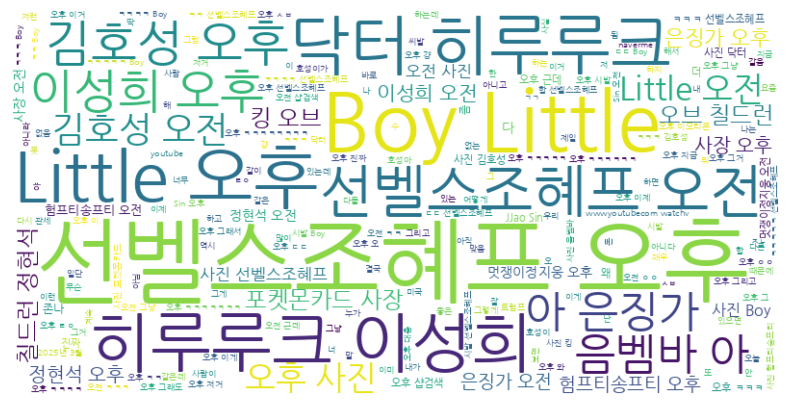

In [131]:
# 워드클라우드, matplotlib import
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드클라우드 생성
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/SW엔지니어/data/NanumGothic.ttf',
                      width=800,height=400,background_color='white').generate(cleaned_text)
# generate(text) : 단어의 빈도수에 따라 글자의 크기 조절.

# 워드클라우드 시각화
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear') # 워드클라우드 시각화, bilinear : 픽셀 깨짐방지
plt.axis('off') # x축, y축 표시 off
plt.show()